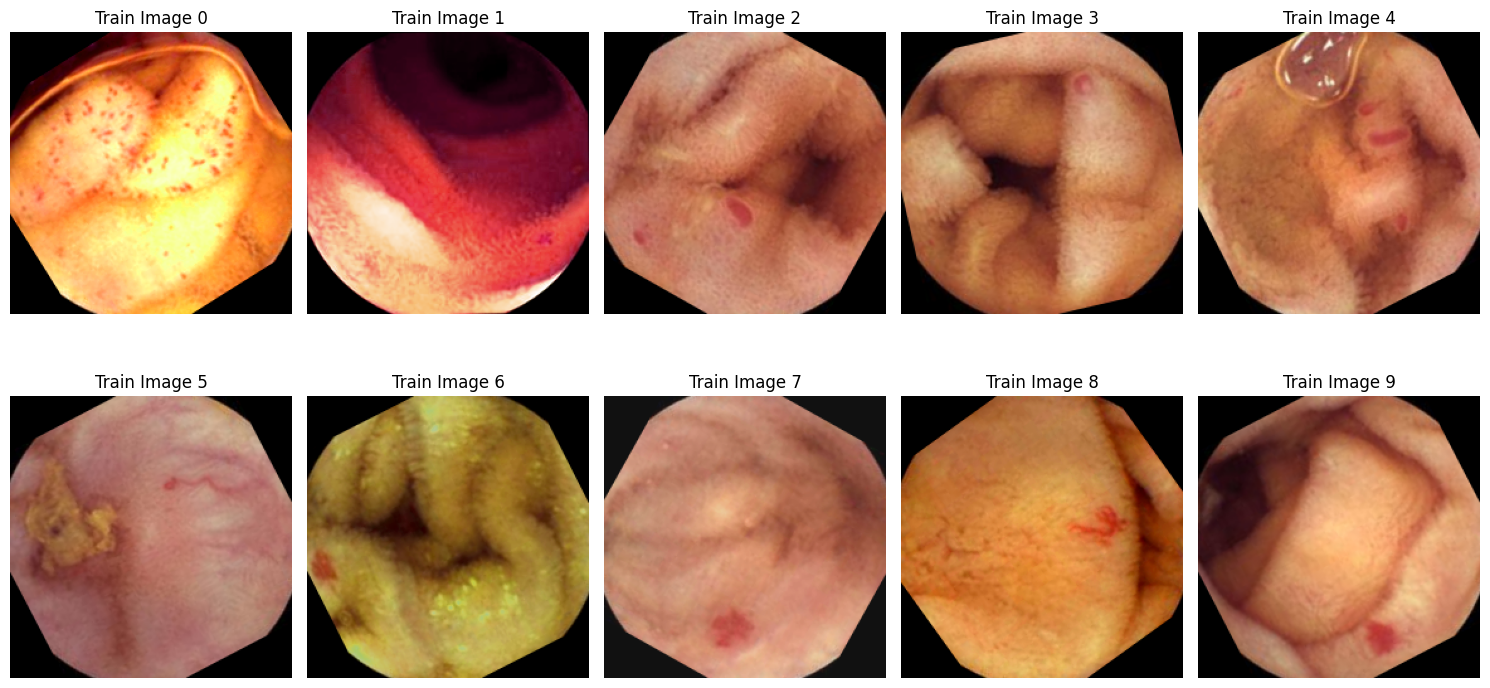

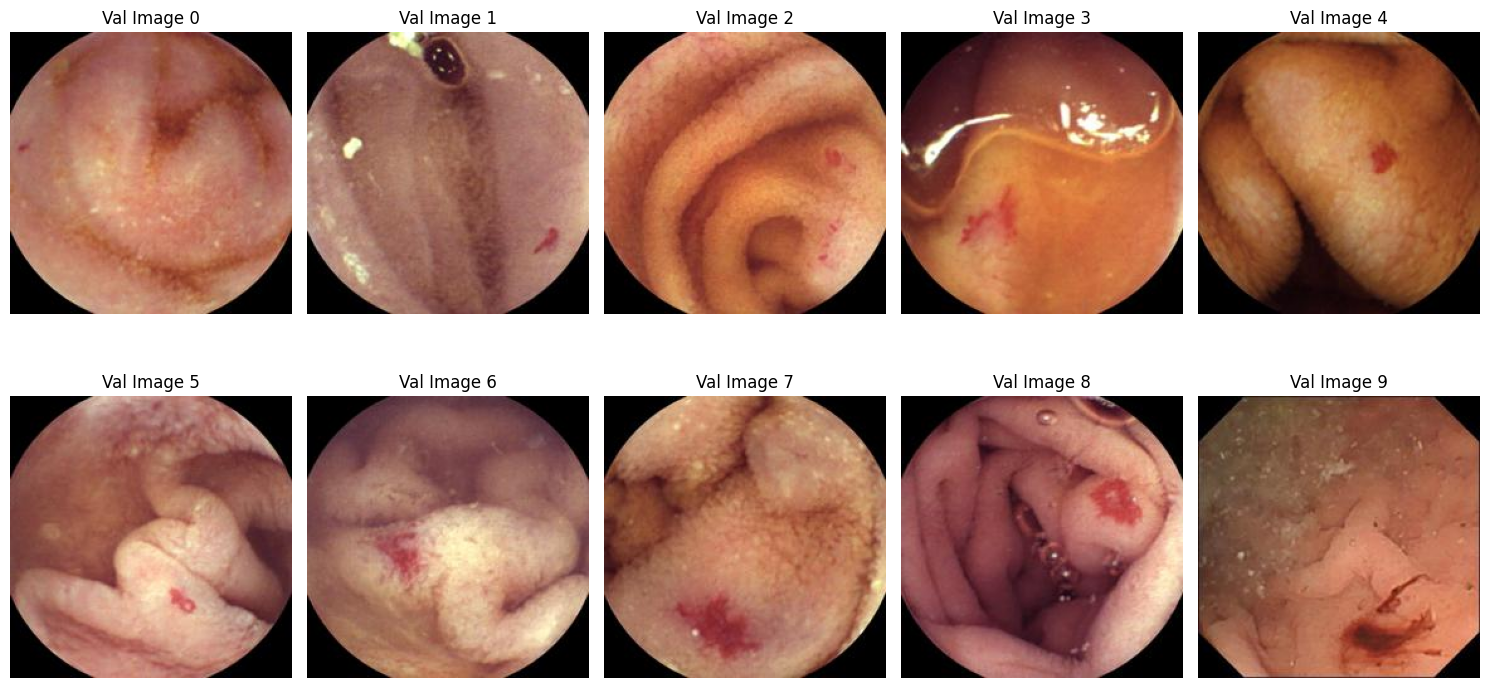

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from albumentations.pytorch import ToTensorV2
import albumentations as A
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms.functional import to_pil_image

# Define the directory paths
train_dir = '../data/training'
val_dir = '../data/validation'
img_size = 224

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.dataset = datasets.ImageFolder(root=root_dir)
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        img = np.array(img)  # Convert PIL image to numpy array

        if self.transform:
            augmented = self.transform(image=img)
            img = augmented['image']

        return img, label


# Define the transformations
train_transforms = A.Compose([
    A.Resize(height=img_size, width=img_size, interpolation=2),
    A.Blur(p=0.1, blur_limit=(3, 7)),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(always_apply=False, p=1.0, limit=(-180, 180), interpolation=1, border_mode=0, value=(0, 0, 0), mask_value=None, rotate_method='largest_box', crop_border=False),
    A.ColorJitter(p=0.5, brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=(-0.1, 0.1)),
    #A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

val_transforms = A.Compose([
    A.Resize(height=img_size, width=img_size, interpolation=2),
    A.CenterCrop(height=img_size, width=img_size, always_apply=True),
    #A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(always_apply=True)
])


# Create datasets and dataloaders
train_dataset = CustomDataset(root_dir=train_dir, transform=train_transforms)
val_dataset = CustomDataset(root_dir=val_dir, transform=val_transforms)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=False, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False, num_workers=0)

# Function to plot images
def plot_images(images, titles, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
    axes = axes.flatten()
    for img, ax, title in zip(images, axes, titles):
        ax.imshow(to_pil_image(img))
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images from the train and val loaders
def get_batch_images(loader):
    images, labels = next(iter(loader))
    return images

# Get a batch of images
train_images = get_batch_images(train_loader)
val_images = get_batch_images(val_loader)

# Convert tensors to numpy arrays for plotting
train_images_np = [img for img in train_images]
val_images_np = [img for img in val_images]

# Plot 10 images from the train set
plot_images(train_images_np[:10], [f'Train Image {i}' for i in range(10)], num_rows=2, num_cols=5)

# Plot 10 images from the validation set
plot_images(val_images_np[:10], [f'Val Image {i}' for i in range(10)], num_rows=2, num_cols=5)